# Logistic Regression

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [5]:
df = pd.read_csv('../../DATA/heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

In [8]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization

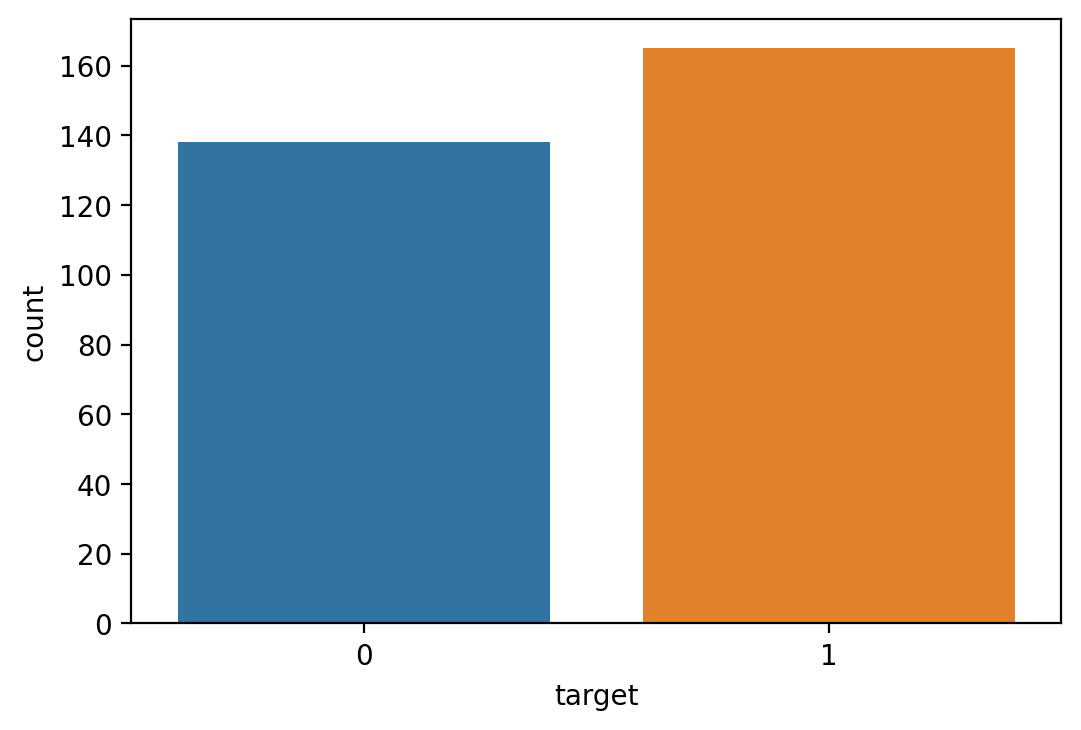

In [11]:
plt.figure(dpi=200)
sns.countplot(data=df, x='target')
plt.show()

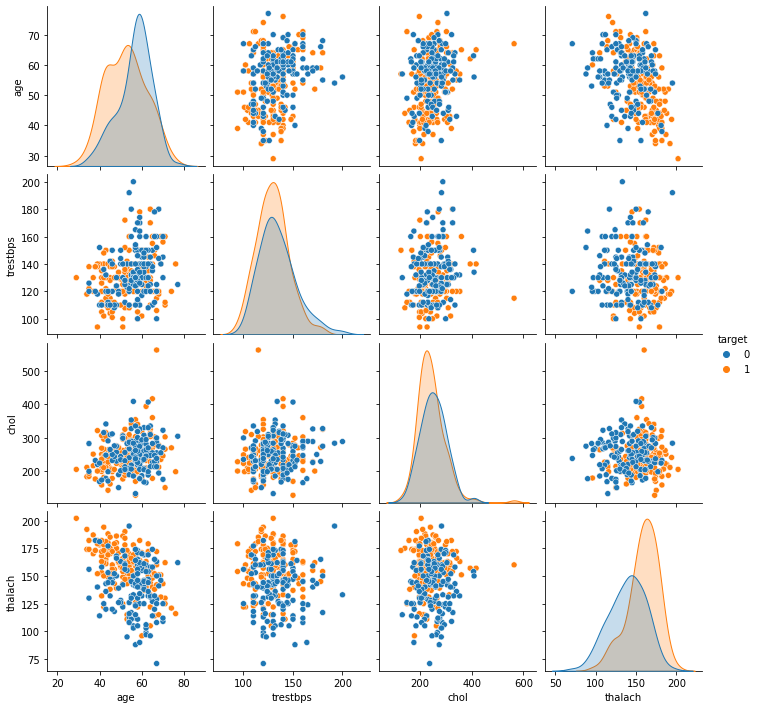

In [12]:
sns.pairplot(data=df, hue='target', vars=['age','trestbps', 'chol','thalach'])

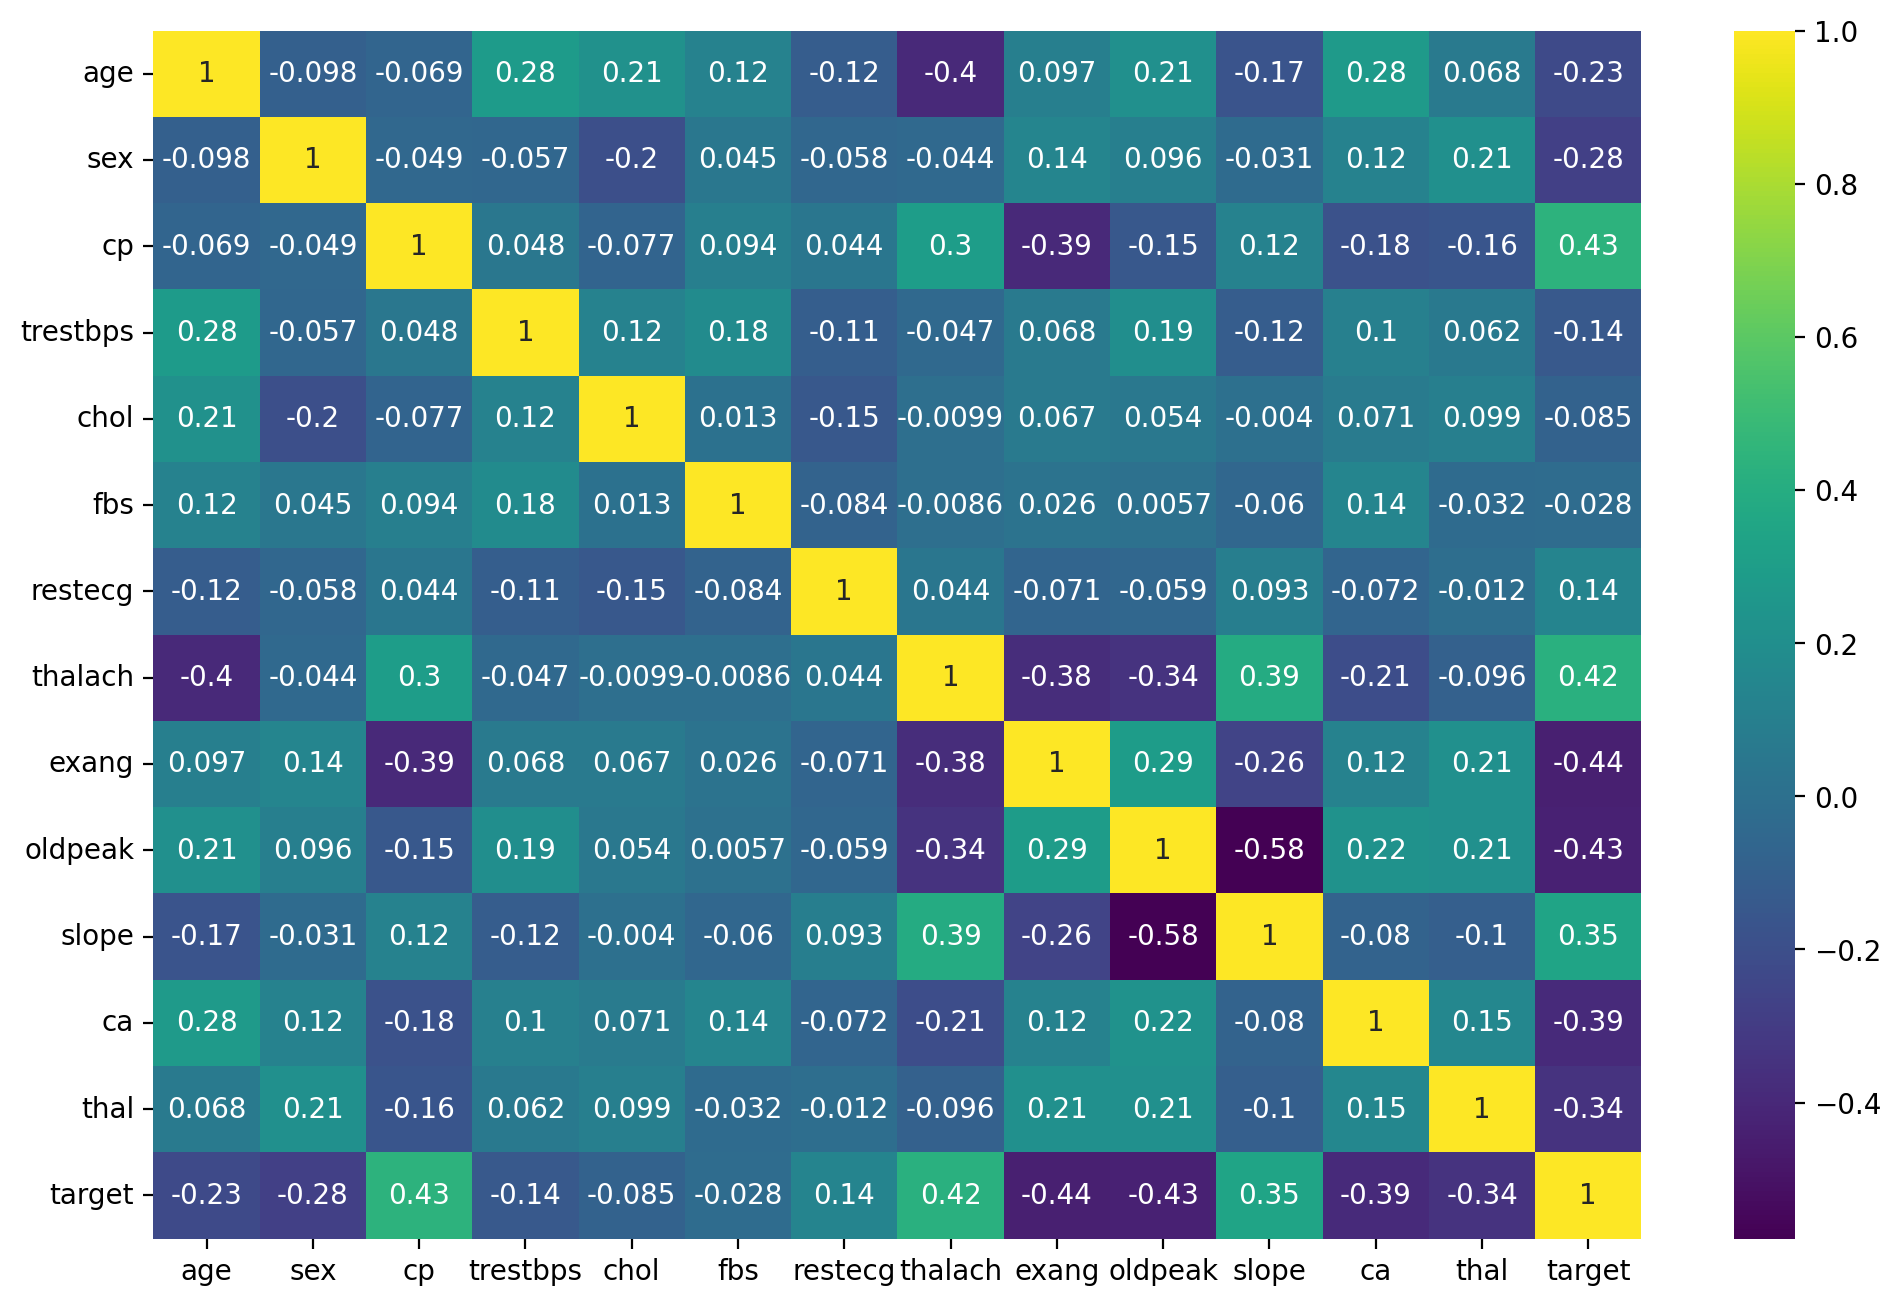

In [13]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

# Machine Learning

## Train | Test Split and Scaling



In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

In [18]:
log_model = LogisticRegression(solver='saga', max_iter=5000, multi_class='ovr')

In [19]:
params = {
    'C': np.linspace(0, 5, 20),
    'l1_ratio': np.linspace(0, 100, 10),
    'penalty': ['l1', 'l2', 'elasticnet']
}

grid_model = GridSearchCV(log_model, param_grid=params)


In [20]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]),
                         'l1_ratio': array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [21]:
grid_model.best_estimator_

LogisticRegression(C=1.0526315789473684, l1_ratio=0.0, max_iter=5000,
                   multi_class='ovr', penalty='l1', solver='saga')

In [22]:
grid_model.best_params_

{'C': 1.0526315789473684, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [23]:
log_model = LogisticRegression(solver='saga', max_iter=5000, multi_class='ovr', C=1.0526315789473684, penalty='l1')

In [24]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0526315789473684, max_iter=5000, multi_class='ovr',
                   penalty='l1', solver='saga')

## Best parameters to use for logistic regression (based on results of GridSearchCV)

In [25]:
log_model.get_params()

{'C': 1.0526315789473684,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Coefficients in logistic regression model

In [26]:
log_model.coef_

array([[-0.0487672 , -0.70069715,  0.89053448, -0.24101131, -0.18877043,
         0.00447092,  0.0973893 ,  0.42338804, -0.40996504, -0.5254497 ,
         0.35985078, -0.83546721, -0.56606736]])

In [27]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [28]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs.sort_values(ascending=True, inplace=True)
coefs

ca         -0.835467
sex        -0.700697
thal       -0.566067
oldpeak    -0.525450
exang      -0.409965
trestbps   -0.241011
chol       -0.188770
age        -0.048767
fbs         0.004471
restecg     0.097389
slope       0.359851
thalach     0.423388
cp          0.890534
dtype: float64

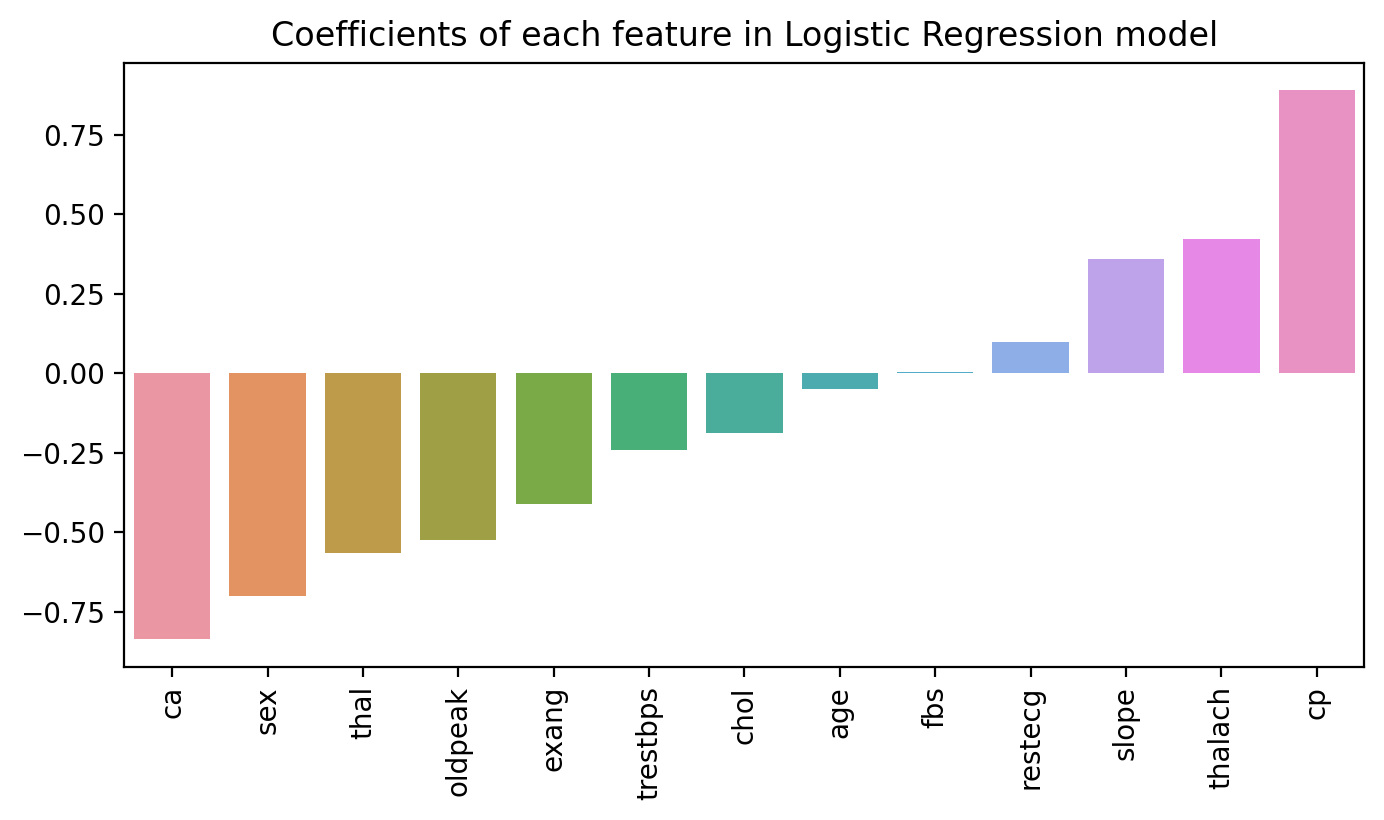

In [29]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation=90)
plt.title('Coefficients of each feature in Logistic Regression model')
plt.show()

---------

## Model Performance Evaluation

In [30]:
y_pred = log_model.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

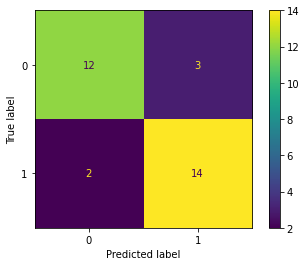

In [32]:
plot_confusion_matrix(log_model, X_test, y_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

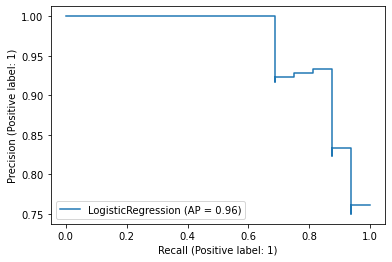

In [34]:
plot_precision_recall_curve(log_model, X_test, y_test)

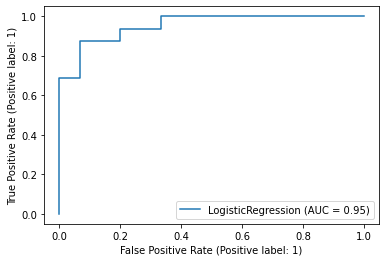

In [35]:
plot_roc_curve(log_model, X_test, y_test)

## A patient arrives with these features


    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

## Model prediction

In [36]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [37]:
log_model.predict(patient)

array([0])

In [38]:
log_model.predict_proba(patient)

array([[1.00000000e+00, 5.91297118e-19]])

In [39]:
log_model.classes_

array([0, 1])

## Model predicts that patient almost certainly doesn't have heart disease!